In [55]:
#import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import os
import cv2
import glob

#import neural network library

import tensorflow as tf 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
basedir='preprocessing/train'

In [3]:
nameTest=os.listdir(basedir)
len(nameTest)

1584

In [4]:
np.unique(nameTest)

array(['Cu1.0_2599966.jpg', 'Cu1.0_3220765.jpg', 'Cu1.0_3780854.jpg', ...,
       'Cu8.8_9318130.jpg', 'Cu8.8_9702046.jpg', 'Cu8.8_9780531.jpg'],
      dtype='<U20')

In [5]:
def imageFeatureExtract(image,size=(28,28)):
    img=cv2.resize(image,size)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = np.expand_dims(gray, 2)#(28, 28, 1)
    return gray

In [6]:
Datasetspath= 'preprocessing/train'
datasetPath = os.path.join(Datasetspath, "*g")
fileRead = glob.glob(datasetPath)

data = []
category_or_class = []

for (i, file) in enumerate(fileRead):
    image = cv2.imread(file)
    feature = imageFeatureExtract(image)
    data.append(feature)
    classNames = file.split(os.path.sep)[-1].split(".")[0]
    category_or_class.append(classNames)

In [7]:
#Dataset scalling
data = np.array(data, dtype = np.uint8)
labels = np.array(category_or_class)

In [8]:
data.shape

(1584, 28, 28, 1)

In [9]:
np.unique(category_or_class)

array(['Cu1', 'Cu1024', 'Cu128', 'Cu16', 'Cu2', 'Cu256', 'Cu32', 'Cu4',
       'Cu512', 'Cu64', 'Cu8'], dtype='<U6')

In [10]:
len(data)

1584

In [11]:
labels

array(['Cu1', 'Cu1', 'Cu1', ..., 'Cu8', 'Cu8', 'Cu8'], dtype='<U6')

In [12]:
np.unique(labels)

array(['Cu1', 'Cu1024', 'Cu128', 'Cu16', 'Cu2', 'Cu256', 'Cu32', 'Cu4',
       'Cu512', 'Cu64', 'Cu8'], dtype='<U6')

In [13]:
label_Encoder = LabelEncoder()
#label_Encoder = preprocessing.LabelEncoder
classNames = label_Encoder.fit_transform(labels)

In [14]:
np.unique(classNames)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [15]:
classNames.shape

(1584,)

In [16]:
classNames[1200]

8

In [17]:
#OneHotEncoder
labelEncoderValue=classNames.reshape(len(classNames),1)
ohe=OneHotEncoder(sparse=False)
oneHotValues=ohe.fit_transform(labelEncoderValue)


In [18]:
oneHotValues

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
#Traintest_split
(Xtrain,xtest,Ytrain,ytest)=train_test_split(data,oneHotValues,test_size=0.2,random_state=42)

In [46]:
Xtrain.shape

(1267, 28, 28, 1)

In [42]:
Xtrain=Xtrain/255

In [44]:
xtest=xtest/255

In [48]:
#xtest

In [45]:
xtest.shape

(317, 28, 28, 1)

In [22]:
Ytrain.shape

(1267, 11)

In [23]:
ytest.shape

(317, 11)

Model

In [49]:
model = Sequential() # Empty 

# 1st layer
model.add(Conv2D(6,kernel_size = (5, 5), strides = (1, 1), activation = "relu", input_shape = (28, 28, 1), padding = "same"))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

# 2nd Layer
model.add(Conv2D(16,kernel_size = (5, 5), strides = (1, 1), activation = "relu", padding = "valid"))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

# Flatten Layer
model.add(Flatten())

# Output Layer
model.add(Dense(120, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(84, activation = "relu"))
model.add(Dense(11, activation = "softmax"))

In [50]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [64]:
import datetime
logsData = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks = tf.keras.callbacks.TensorBoard(log_dir = logsData, histogram_freq = 1)

In [60]:
#earlyStoping = EarlyStopping(monitor = 'val_accuracy',
                            #mode = "max", 
                            #verbose = 1, 
                            #patience = 2)

In [65]:
history=model.fit(Xtrain, Ytrain,
          epochs = 150,
          validation_data = (xtest, ytest), 
          callbacks=[callbacks],
          verbose = 1)

Epoch 1/150
40/40 [==============================] - 1s 23ms/step - loss: 0.2860 - accuracy: 0.8840 - val_loss: 0.3373 - val_accuracy: 0.8580
Epoch 2/150
40/40 [==============================] - 1s 22ms/step - loss: 0.3188 - accuracy: 0.8658 - val_loss: 0.2992 - val_accuracy: 0.8833
Epoch 3/150
40/40 [==============================] - 1s 22ms/step - loss: 0.2434 - accuracy: 0.9061 - val_loss: 0.2916 - val_accuracy: 0.8991
Epoch 4/150
40/40 [==============================] - 1s 23ms/step - loss: 0.2634 - accuracy: 0.8887 - val_loss: 0.3364 - val_accuracy: 0.8486
Epoch 5/150
40/40 [==============================] - 1s 23ms/step - loss: 0.2607 - accuracy: 0.8966 - val_loss: 0.3252 - val_accuracy: 0.8675
Epoch 6/150
40/40 [==============================] - 1s 23ms/step - loss: 0.2542 - accuracy: 0.9006 - val_loss: 0.3268 - val_accuracy: 0.8675
Epoch 7/150
40/40 [==============================] - 1s 22ms/step - loss: 0.2663 - accuracy: 0.8966 - val_loss: 0.3202 - val_accuracy: 0.8801
Epoch 

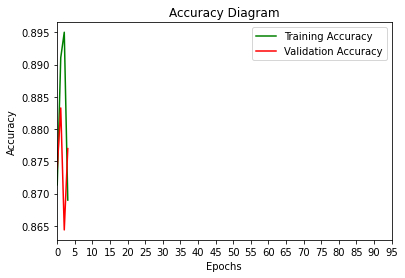

In [63]:
#accuracy
epochs=100

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy Diagram')

plt.plot(history.history['accuracy'], 'green', label='Training Accuracy')

plt.plot(history.history['val_accuracy'], 'red', label='Validation Accuracy')

plt.xticks(range(0,epochs)[0::5])

plt.legend()

plt.show()

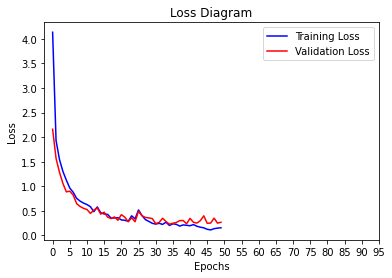

In [30]:
#loss

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss Diagram')

plt.plot(history.history['loss'], 'blue', label='Training Loss')

plt.plot(history.history['val_loss'], 'red', label='Validation Loss')

plt.xticks(range(0,epochs)[0::5])

plt.legend()

plt.show()

In [33]:
testImageData = cv2.imread("preprocessing/new_2^n_test/Cu32/Cu32.0_6178311.jpg")
testImageDataFeature = imageFeatureExtract(testImageData)/255.0
testImageDataFeature = np.array([testImageDataFeature])

In [34]:
testImageDataFeature.shape

(1, 28, 28, 1)

In [35]:
predict = model.predict(testImageDataFeature)[0]

1/1 [==============================] - 0s 196ms/step


In [36]:
predict

array([0.0732189 , 0.13989346, 0.08569515, 0.08839885, 0.08080948,
       0.09796888, 0.08655454, 0.06790217, 0.10576498, 0.09601519,
       0.07777839], dtype=float32)

In [37]:
probability = model.predict(testImageDataFeature)

1/1 [==============================] - 0s 33ms/step


In [38]:
probability

array([[0.0732189 , 0.13989346, 0.08569515, 0.08839885, 0.08080948,
        0.09796888, 0.08655454, 0.06790217, 0.10576498, 0.09601519,
        0.07777839]], dtype=float32)

In [39]:
probabilityMaximum = predict.argmax(axis = 0)
probabilityMaximum

1

In [40]:
classData=np.unique(labels)
classData

array(['Cu1', 'Cu1024', 'Cu128', 'Cu16', 'Cu2', 'Cu256', 'Cu32', 'Cu4',
       'Cu512', 'Cu64', 'Cu8'], dtype='<U6')

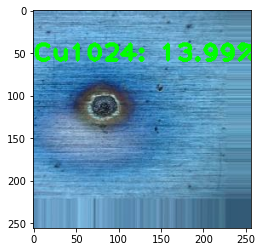

In [41]:
imageDataLabels = "{}: {:.2f}%".format(classData[probabilityMaximum], predict[probabilityMaximum]*100)
cv2.putText(testImageData, imageDataLabels, (0, 60), cv2.FONT_HERSHEY_PLAIN, 2.0, (0, 255, 0), 3)

plt.imshow(testImageData, cmap = "gray")
plt.show()